# Project 1: Titanic Survival Prediction

## Goal
Predict whether a passenger survived the Titanic disaster based on features like Age, Class, Fare, etc.

## Steps
1. Load Data
2. Exploratory Data Analysis (EDA)
3. Data Cleaning
4. Train Model (Logistic Regression)
5. Evaluate

In [19]:
# 1. Install necessary libraries
%pip install pandas seaborn matplotlib scikit-learn

In [20]:
# 2. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset directly from Seaborn
df = sns.load_dataset('titanic')

# View first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Exploratory Data Analysis (EDA)
Let's check for missing values and visualize some relationships.

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


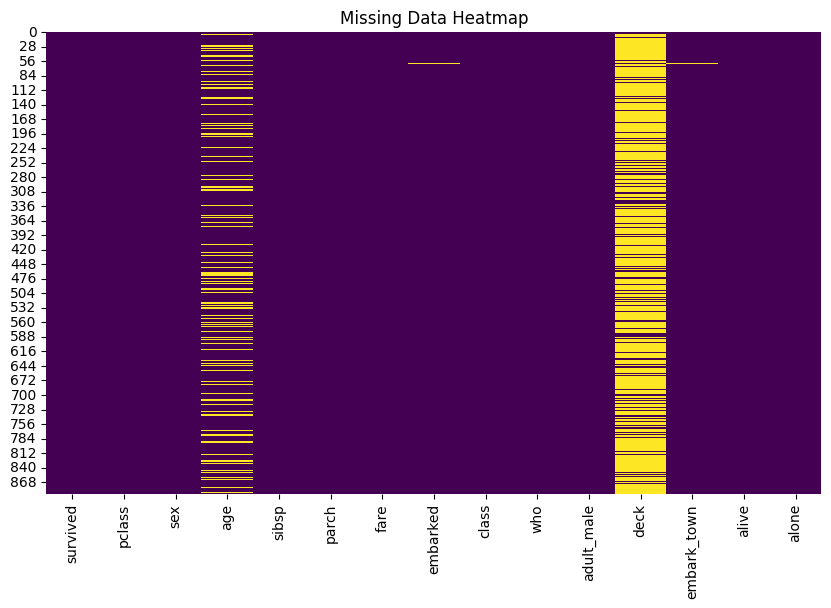

In [21]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## 3. Data Cleaning
From the heatmap and counts, we see:
- `deck` has too many missing values -> **Drop it**.
- `age` has some missing values -> **Fill with Median**.
- `embarked` has very few missing -> **Drop rows**.

In [22]:
# 1. Drop 'deck' column
df.drop('deck', axis=1, inplace=True)

# 2. Fill missing 'age' with median
df['age'] = df['age'].fillna(df['age'].median())

# 3. Drop rows with missing 'embarked' or 'embark_town'
df.dropna(subset=['embarked', 'embark_town'], inplace=True)

# Verify no missing values remain
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


## 4. Model Training
We need to convert categories (male/female) into numbers before training.

Steps:
1. Select Features (X) and Target (y)
2. Convert Categorical Data (One-Hot Encoding)
3. Split into Train/Test sets
4. Train Logistic Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Select relevant features
# We will use: pclass, sex, age, sibsp, parchment, fare, embarked
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']

# 2. Convert Categorical Variables (Sex, Embarked) into Numbers (0/1)
# drop_first=True avoids the "dummy variable trap" (multicollinearity)
X = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)

# 3. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# 5. Evaluate Accuracy
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc * 100:.2f}%")

Logistic Regression Accuracy: 78.09%


## 5. Experimenting with Other Models
Let's try:
1. **Random Forest**: An ensemble of Decision Trees. Good for non-linear data.
2. **Support Vector Machine (SVM)**: Finds the best boundary (hyperplane) to separate classes.
3. **K-Nearest Neighbors (KNN)**: Classifies based on the majority of nearest neighbors.

Random Forest Accuracy: 76.97%
SVM Accuracy: 68.54%
KNN Accuracy: 68.54%


C:\Users\divyansh\AppData\Local\Temp\ipykernel_14312\3653193207.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")


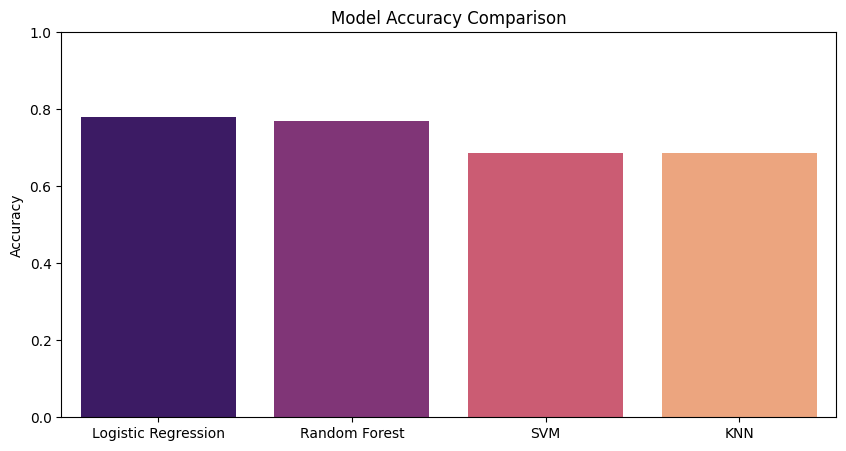

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and Evaluate each model
results = {"Logistic Regression": lr_acc}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc * 100:.2f}%")

# Visualize Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="magma")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

## 6. Improving Performance with Feature Scaling
SVM and KNN are sensitive to the scale of data (e.g., Fare is 0-500, Age is 0-80).
We will use `StandardScaler` to scale all features to the same range.

Results AFTER Scaling:
Random Forest: 78.09%
SVM: 80.90%
KNN: 79.21%
Logistic Regression: 76.97%


C:\Users\divyansh\AppData\Local\Temp\ipykernel_14312\3091284196.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scaled_results.keys()), y=list(scaled_results.values()), palette="viridis")


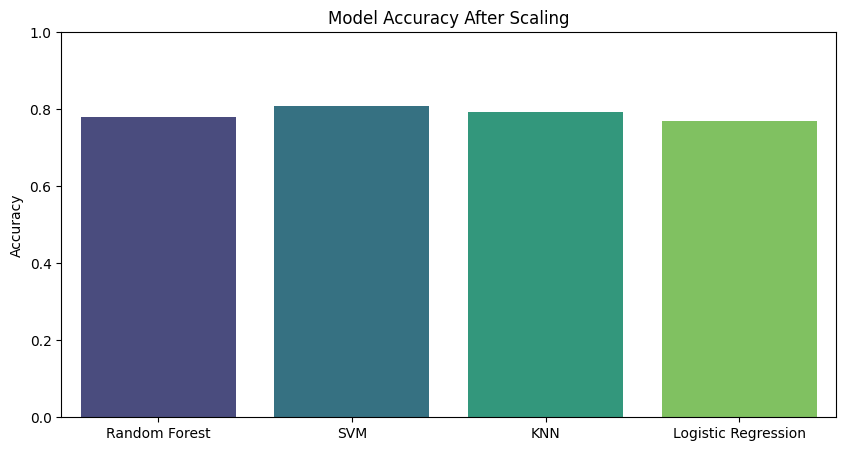

In [25]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize Scaler
scaler = StandardScaler()

# 2. Scale the features (Fit on training data, transform both)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Retrain Models on Scaled Data
scaled_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    scaled_results[name] = acc

# Add Logistic Regression (it also benefits from scaling)
lr_model.fit(X_train_scaled, y_train)
lr_pred_scaled = lr_model.predict(X_test_scaled)
scaled_results["Logistic Regression"] = accuracy_score(y_test, lr_pred_scaled)

# Print New Results
print("Results AFTER Scaling:")
for name, acc in scaled_results.items():
    print(f"{name}: {acc * 100:.2f}%")

# Visualize Improvement
plt.figure(figsize=(10, 5))
sns.barplot(x=list(scaled_results.keys()), y=list(scaled_results.values()), palette="viridis")
plt.title("Model Accuracy After Scaling")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()